In [1]:
import matplotlib.pyplot as plt
import cartoframes
from cartoframes import Credentials
import pandas as pd

USERNAME = 'nikleonidakis'  # <-- replace with your username 
APIKEY = '3292af73f4256ea0fcdb316a09895460f5d7ac2e'       # <-- your CARTO API key
creds = Credentials(username=USERNAME, 
                    key=APIKEY)
cc = cartoframes.CartoContext(creds=creds)

In [2]:
from cartoframes.examples import read_brooklyn_poverty
cc.write(read_brooklyn_poverty(), 'brooklyn_poverty_example', overwrite=True)

Table successfully written to CARTO: https://nikleonidakis.carto.com/dataset/brooklyn_poverty_example


In [3]:
# Get a CARTO table as a pandas DataFrame
df = cc.read('brooklyn_poverty_example')
df.head()

,commuters_16_over_2011_2015,geoid,pop_determined_poverty_status_2011_2015,poverty_count,poverty_per_pop,the_geom,total_pop_2011_2015,total_population,walked_to_work_2011_2015_per_pop
cartodb_id,,,,,,,,,
1606,0.0,360470702031,0.0,NaN,NaN,0106000020E61000000800000001030000000100000013...,0.0,0,NaN
2052,NaN,360479901000,NaN,NaN,NaN,None,NaN,0,NaN
111,0.0,360470666001,0.0,NaN,NaN,0106000020E6100000030000000103000000010000006B...,0.0,0,1.553393e-12
116,NaN,360470702030,NaN,NaN,NaN,None,NaN,0,NaN
91,15928.0,360470080002,31367.0,225.0,0.17201,0106000020E61000000100000001030000000100000007...,39471.0,1309,1.505213e-02


In [4]:
df.dtypes

commuters_16_over_2011_2015                float64
geoid                                       object
pop_determined_poverty_status_2011_2015    float64
poverty_count                              float64
poverty_per_pop                            float64
the_geom                                    object
total_pop_2011_2015                        float64
total_population                             int64
walked_to_work_2011_2015_per_pop           float64
dtype: object

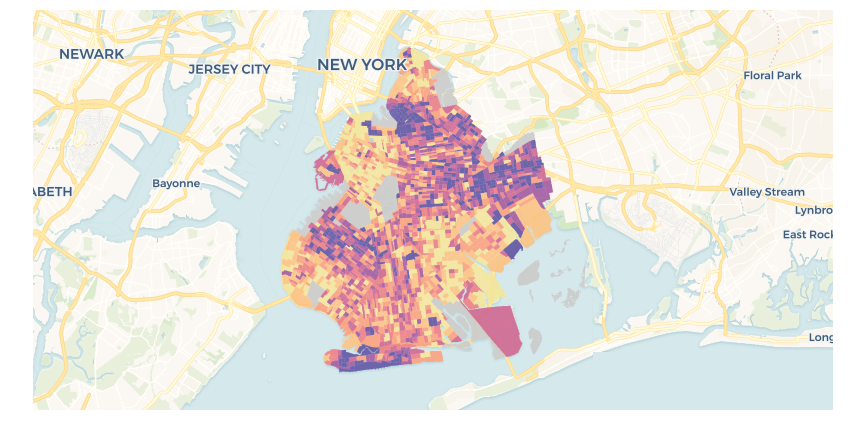

In [5]:
from cartoframes import Layer, styling, BaseMap
l = Layer('brooklyn_poverty_example',
          color={'column': 'poverty_per_pop',
                 'scheme': styling.sunset(7)})
cc.map(layers=l,
       interactive=False)

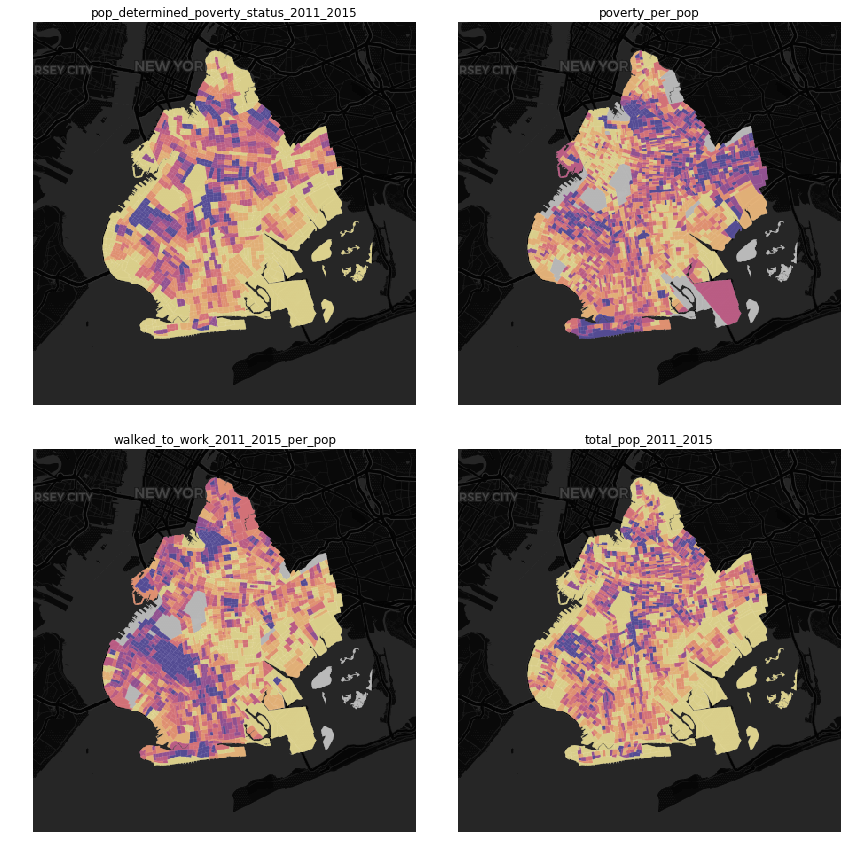

In [6]:
table = 'brooklyn_poverty_example'
cols = [
    'pop_determined_poverty_status_2011_2015',
    'poverty_per_pop',
    'walked_to_work_2011_2015_per_pop',
    'total_pop_2011_2015'
]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for idx, col in enumerate(cols):
    cc.map(layers=[BaseMap('dark'), Layer(table,
                        color={'column': col,
                               'scheme': styling.sunset(7, 'quantiles')})],
           ax=axs[idx // 2][idx % 2],
           zoom=11, lng=-73.9476, lat=40.6437,
           interactive=False,
           size=(432, 432))
    axs[idx // 2][idx % 2].set_title(col)
fig.tight_layout()
plt.show()

In [7]:
# read in a CSV of NYC taxi data from cartoframes example datasets
from cartoframes.examples import read_taxi
df = read_taxi()

# show first five rows to see what we've got
df.head()

,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,ratecodeid,store_and_fwd_flag,the_geom,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance,vendorid
cartodb_id,,,,,,,,,,,,,,,,,,,,
1,40.706779,-74.012383,0.0,8.5,0.3,0.5,2,1,40.730461,-74.006706,1,False,None,1.00,0.0,10.30,2016-05-01 15:00:36+00:00,2016-05-01 14:52:11+00:00,2.08,2
2,40.762779,-73.973824,0.0,13.5,0.3,0.5,1,1,40.744125,-73.924957,1,False,None,2.00,0.0,16.30,2016-05-01 08:49:02+00:00,2016-05-01 08:34:08+00:00,3.00,1
3,40.740833,-73.998955,0.0,14.5,0.3,0.5,1,2,40.748501,-73.973488,1,False,None,0.00,0.0,15.30,2016-05-04 10:07:09+00:00,2016-05-04 09:44:40+00:00,2.10,1
4,40.792370,-73.966362,0.5,15.0,0.3,0.5,1,2,40.743267,-73.999786,1,False,None,0.00,0.0,16.30,2016-05-01 21:05:24+00:00,2016-05-01 20:50:11+00:00,4.41,2
5,40.784939,-73.956963,0.0,19.5,0.3,0.5,2,1,40.803360,-73.963631,1,False,None,4.06,0.0,24.36,2016-05-02 07:53:53+00:00,2016-05-02 07:26:56+00:00,4.01,2


In [8]:
# send it to carto so we can map it
# specify the columns we want to have as a point (pickup location)
cc.write(df, 'taxi_50k',
         lnglat=('pickup_longitude', 'pickup_latitude'),
         overwrite=True)

# read the fresh carto-fied version
df = cc.read('taxi_50k')

Table successfully written to CARTO: https://nikleonidakis.carto.com/dataset/taxi_50k
`the_geom` column is being populated from `('pickup_longitude', 'pickup_latitude')`. Check the status of the operation with:
    BatchJobStatus(CartoContext(), 'a7a5a853-dab7-4a15-9f86-1ed5a808a4d2').status()
or try reading the table from CARTO in a couple of minutes.
Note: `CartoContext.map` will not work on this table until its geometries are created.


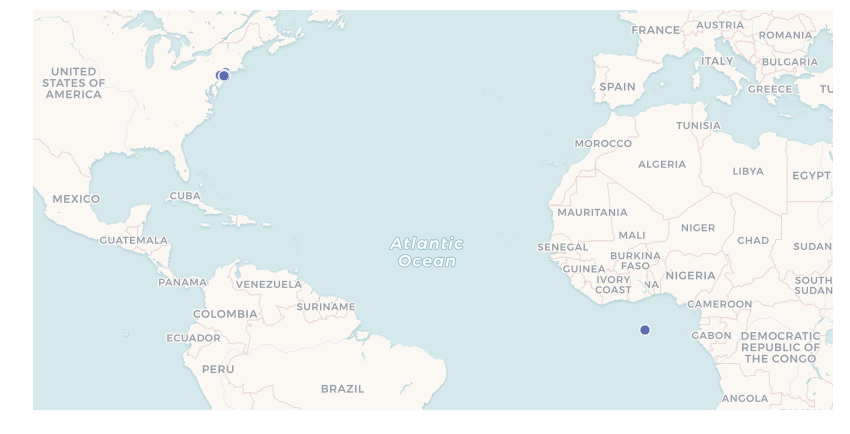

In [9]:
from cartoframes import Layer
cc.map(layers=Layer('taxi_50k'),
       interactive=False)

In [10]:
# select only the rows which are not at (0,0)
df = df[(df['pickup_longitude'] != 0) | (df['pickup_latitude'] != 0)]
# send back up to CARTO
cc.write(df, 'taxi_50k', overwrite=True,
         lnglat=('pickup_longitude', 'pickup_latitude'))

Table successfully written to CARTO: https://nikleonidakis.carto.com/dataset/taxi_50k
`the_geom` column is being populated from `('pickup_longitude', 'pickup_latitude')`. Check the status of the operation with:
    BatchJobStatus(CartoContext(), '9b98117e-8564-4329-a124-20e8f593aef6').status()
or try reading the table from CARTO in a couple of minutes.
Note: `CartoContext.map` will not work on this table until its geometries are created.


BatchJobStatus(job_id='9b98117e-8564-4329-a124-20e8f593aef6', last_status='pending', created_at='2019-03-22T14:16:28.797Z')

In [11]:
# Let's take a look at what's going on, styled by the fare amount
cc.map(layers=Layer('taxi_50k',
                    size=4,
                    color={'column': 'fare_amount',
                           'scheme': styling.sunset(7)}),
       interactive=True)

ValueError: No geometry for layer. Check all layer tables and queries to ensure there are geometries.

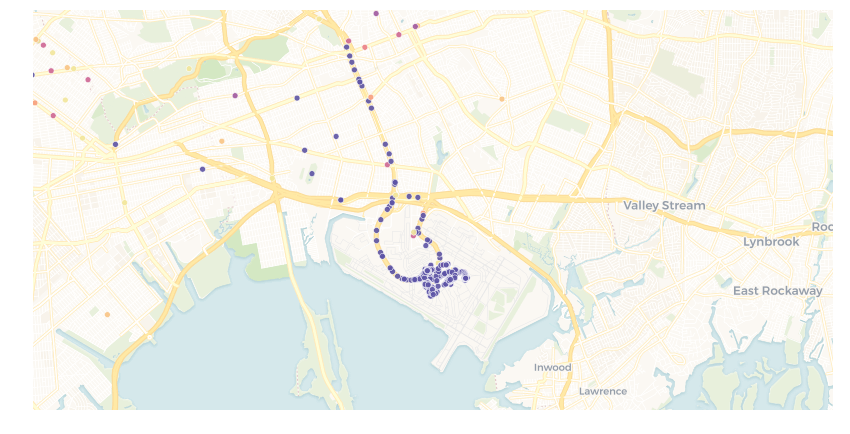

In [12]:
# Let's take a look at what's going on at JFK airport, styled by the fare amount, and STATIC
cc.map(layers=Layer('taxi_50k',
                    size=6,
                    color={'column': 'fare_amount',
                           'scheme': styling.sunset(7)}),
       zoom=12, lng=-73.7880, lat=40.6629,
       interactive=False)